# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:


# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

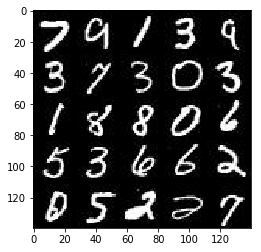

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

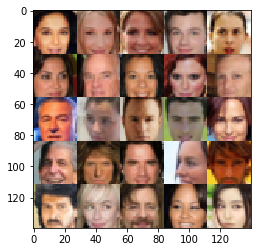

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),name = 'input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name = 'input_z')
    learning_rate = tf.placeholder(tf.float32,None,name = 'learning_rate')

    return input_real, input_z , learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
       
        x = tf.layers.conv2d(images, 64, (5, 5), strides = (2, 2), padding = 'same')
        x = tf.maximum(0.2 * x, x)
        
        x = tf.layers.conv2d(x, 128, (5, 5), strides = (2, 2), padding = 'same')
        x = tf.layers.batch_normalization(x)
        x = tf.maximum(0.2 * x, x)
        
        x = tf.layers.conv2d(x, 256, (5, 5), strides = (2, 2), padding = 'same')
        x = tf.layers.batch_normalization(x)
        x = tf.maximum(0.2 * x, x)
        
        x = tf.reshape(x, (-1, 4*4*256))
        disc_logits = tf.layers.dense(x, 1)
        disc_out = tf.sigmoid(disc_logits)

    return disc_out, disc_logits
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse = not is_train):
        x = tf.layers.dense(z, 4*4*512)
        x = tf.reshape(x, (-1, 4, 4, 512))
        x = tf.layers.batch_normalization(x, training = is_train)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d_transpose(x, 256, (4, 4), strides = (1, 1), padding = 'valid')
        x = tf.layers.batch_normalization(x, training = is_train)
        x = tf.maximum(0.2*x, x)
        x = tf.layers.conv2d_transpose(x, 128, (5, 5), strides = (2, 2), padding = 'same')
        x = tf.layers.batch_normalization(x, training = is_train)
        x = tf.maximum(0.2*x, x)
        x = tf.layers.conv2d_transpose(x, 64, (5, 5), strides = (2, 2), padding = 'same')
        x = tf.layers.batch_normalization(x, training = is_train)
        x = tf.maximum(0.2*x, x)
        
        x = tf.layers.conv2d_transpose(x, out_channel_dim, (5, 5), strides = (1, 1), padding = 'same')
        out = tf.tanh(x)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    ge_model = generator(input_z, out_channel_dim, is_train = True)
    di_model_real, d_logits_real = discriminator(input_real, reuse = False)
    di_model_fake, d_logits_fake = discriminator(ge_model, reuse = True)
    di_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_real, 
                                                                         labels = tf.ones_like(di_model_real)))
    di_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, 
                                                                         labels = tf.zeros_like(di_model_fake)))
    ge_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logits_fake, 
                                                                    labels = tf.ones_like(di_model_fake)))

    di_loss = di_loss_real + di_loss_fake
    
    return di_loss, ge_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function

    t_vars = tf.trainable_variables()
    di_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    ge_vars = [var for var in t_vars if var.name.startswith('generator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        di_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list = di_vars)
        ge_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list = ge_vars)
    
    return di_train_opt, ge_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    steps = 0
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    di_loss, ge_loss = model_loss(input_real, input_z, data_shape[3])
    di_opt, ge_opt = model_opt(di_loss, ge_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(di_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(ge_opt, feed_dict={input_z: batch_z, input_real: batch_images})
                if steps % 10 == 0:
                    train_loss_d = di_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = ge_loss.eval({input_z: batch_z})

                    print('Epoch {}/{} Discriminator Loss {:.4f}   Generator Loss = {:.4f}'.format(
                    epoch_i + 1, epoch_count, 
                    train_loss_d,
                    train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, len(data_image_mode), data_image_mode)
                steps += 1
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 Discriminator Loss 1.2698   Generator Loss = 0.6221


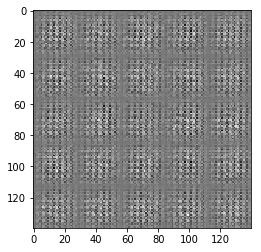

Epoch 1/2 Discriminator Loss 0.9528   Generator Loss = 0.8128
Epoch 1/2 Discriminator Loss 1.3886   Generator Loss = 0.6058
Epoch 1/2 Discriminator Loss 0.8514   Generator Loss = 1.1514
Epoch 1/2 Discriminator Loss 0.3525   Generator Loss = 4.9776
Epoch 1/2 Discriminator Loss 1.4732   Generator Loss = 0.7359
Epoch 1/2 Discriminator Loss 0.7369   Generator Loss = 1.3315
Epoch 1/2 Discriminator Loss 0.3771   Generator Loss = 2.1027
Epoch 1/2 Discriminator Loss 0.1092   Generator Loss = 2.9764
Epoch 1/2 Discriminator Loss 0.0646   Generator Loss = 4.6363
Epoch 1/2 Discriminator Loss 0.8954   Generator Loss = 2.0829


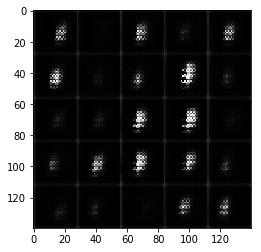

Epoch 1/2 Discriminator Loss 1.0901   Generator Loss = 1.5347
Epoch 1/2 Discriminator Loss 0.2131   Generator Loss = 2.6467
Epoch 1/2 Discriminator Loss 0.1837   Generator Loss = 2.5269
Epoch 1/2 Discriminator Loss 0.7456   Generator Loss = 1.4117
Epoch 1/2 Discriminator Loss 0.9716   Generator Loss = 1.0355
Epoch 1/2 Discriminator Loss 1.0067   Generator Loss = 1.1988
Epoch 1/2 Discriminator Loss 1.3228   Generator Loss = 0.9318
Epoch 1/2 Discriminator Loss 1.7787   Generator Loss = 0.6029
Epoch 1/2 Discriminator Loss 1.0348   Generator Loss = 0.9465
Epoch 1/2 Discriminator Loss 1.5497   Generator Loss = 0.7619


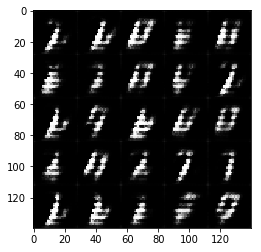

Epoch 1/2 Discriminator Loss 1.2760   Generator Loss = 0.9374
Epoch 1/2 Discriminator Loss 1.1916   Generator Loss = 0.7949
Epoch 1/2 Discriminator Loss 1.2126   Generator Loss = 0.9351
Epoch 1/2 Discriminator Loss 1.0039   Generator Loss = 1.1112
Epoch 1/2 Discriminator Loss 0.8249   Generator Loss = 1.0489
Epoch 1/2 Discriminator Loss 1.3504   Generator Loss = 0.6752
Epoch 1/2 Discriminator Loss 1.3577   Generator Loss = 0.8394
Epoch 1/2 Discriminator Loss 1.2063   Generator Loss = 0.9058
Epoch 1/2 Discriminator Loss 1.4041   Generator Loss = 0.8784
Epoch 1/2 Discriminator Loss 1.1779   Generator Loss = 0.9257


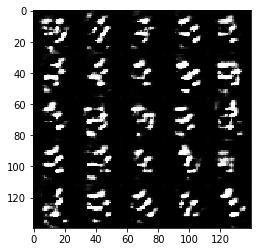

Epoch 1/2 Discriminator Loss 0.9995   Generator Loss = 1.0811
Epoch 1/2 Discriminator Loss 1.0950   Generator Loss = 0.8620
Epoch 1/2 Discriminator Loss 1.4453   Generator Loss = 0.8774
Epoch 1/2 Discriminator Loss 0.9524   Generator Loss = 0.9957
Epoch 1/2 Discriminator Loss 1.2691   Generator Loss = 0.7751
Epoch 1/2 Discriminator Loss 1.0565   Generator Loss = 1.0643
Epoch 1/2 Discriminator Loss 1.1326   Generator Loss = 1.0755
Epoch 1/2 Discriminator Loss 1.1745   Generator Loss = 0.8550
Epoch 1/2 Discriminator Loss 1.8718   Generator Loss = 0.5352
Epoch 1/2 Discriminator Loss 1.3975   Generator Loss = 0.9233


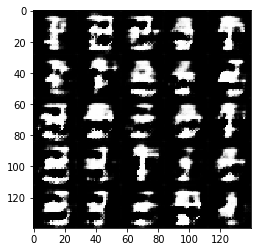

Epoch 1/2 Discriminator Loss 1.2346   Generator Loss = 0.8279
Epoch 1/2 Discriminator Loss 1.5576   Generator Loss = 0.7758
Epoch 1/2 Discriminator Loss 1.1668   Generator Loss = 0.8929
Epoch 1/2 Discriminator Loss 1.1530   Generator Loss = 1.0164
Epoch 1/2 Discriminator Loss 1.1929   Generator Loss = 0.8169
Epoch 1/2 Discriminator Loss 1.0240   Generator Loss = 0.9860
Epoch 1/2 Discriminator Loss 1.2773   Generator Loss = 0.8820
Epoch 1/2 Discriminator Loss 1.2888   Generator Loss = 0.7250
Epoch 1/2 Discriminator Loss 1.0350   Generator Loss = 0.9205
Epoch 1/2 Discriminator Loss 1.2842   Generator Loss = 0.7364


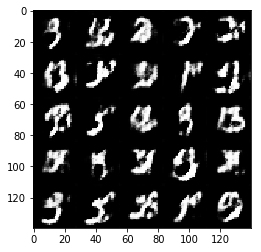

Epoch 1/2 Discriminator Loss 1.1054   Generator Loss = 0.8921
Epoch 1/2 Discriminator Loss 1.3682   Generator Loss = 0.6340
Epoch 1/2 Discriminator Loss 1.1539   Generator Loss = 1.0323
Epoch 1/2 Discriminator Loss 1.0863   Generator Loss = 0.9210
Epoch 1/2 Discriminator Loss 1.1363   Generator Loss = 1.0193
Epoch 1/2 Discriminator Loss 1.3036   Generator Loss = 0.8059
Epoch 1/2 Discriminator Loss 1.0112   Generator Loss = 0.8235
Epoch 1/2 Discriminator Loss 1.2001   Generator Loss = 0.8818
Epoch 1/2 Discriminator Loss 1.1694   Generator Loss = 1.0318
Epoch 1/2 Discriminator Loss 0.9700   Generator Loss = 0.8968


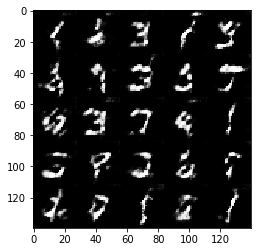

Epoch 1/2 Discriminator Loss 1.3342   Generator Loss = 0.6521
Epoch 1/2 Discriminator Loss 1.1096   Generator Loss = 0.8707
Epoch 1/2 Discriminator Loss 1.2160   Generator Loss = 0.9131
Epoch 1/2 Discriminator Loss 1.1442   Generator Loss = 1.0548
Epoch 1/2 Discriminator Loss 1.4138   Generator Loss = 0.9718
Epoch 1/2 Discriminator Loss 1.2414   Generator Loss = 0.9417
Epoch 1/2 Discriminator Loss 1.1994   Generator Loss = 0.8001
Epoch 1/2 Discriminator Loss 1.2420   Generator Loss = 0.7762
Epoch 1/2 Discriminator Loss 1.2455   Generator Loss = 0.8717
Epoch 1/2 Discriminator Loss 1.2183   Generator Loss = 0.7986


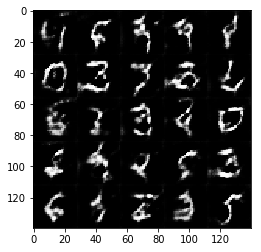

Epoch 1/2 Discriminator Loss 1.0665   Generator Loss = 0.8770
Epoch 1/2 Discriminator Loss 1.1396   Generator Loss = 0.8558
Epoch 1/2 Discriminator Loss 1.3369   Generator Loss = 0.6301
Epoch 1/2 Discriminator Loss 1.2795   Generator Loss = 0.8076
Epoch 1/2 Discriminator Loss 1.0718   Generator Loss = 0.9039
Epoch 1/2 Discriminator Loss 1.1193   Generator Loss = 0.7766
Epoch 1/2 Discriminator Loss 1.2641   Generator Loss = 0.8202
Epoch 1/2 Discriminator Loss 1.0904   Generator Loss = 1.0148
Epoch 1/2 Discriminator Loss 1.2439   Generator Loss = 0.7307
Epoch 1/2 Discriminator Loss 1.1785   Generator Loss = 0.8561


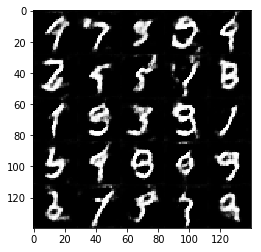

Epoch 1/2 Discriminator Loss 1.2206   Generator Loss = 0.7969
Epoch 1/2 Discriminator Loss 1.2562   Generator Loss = 0.8800
Epoch 1/2 Discriminator Loss 1.4057   Generator Loss = 0.8039
Epoch 1/2 Discriminator Loss 1.3498   Generator Loss = 0.5915
Epoch 1/2 Discriminator Loss 1.1821   Generator Loss = 0.9193
Epoch 1/2 Discriminator Loss 1.1701   Generator Loss = 0.8557
Epoch 1/2 Discriminator Loss 1.2065   Generator Loss = 0.8046
Epoch 1/2 Discriminator Loss 1.3009   Generator Loss = 0.6626
Epoch 1/2 Discriminator Loss 1.4025   Generator Loss = 0.6444
Epoch 1/2 Discriminator Loss 1.3975   Generator Loss = 0.8060


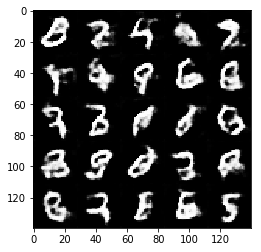

Epoch 1/2 Discriminator Loss 1.1996   Generator Loss = 0.8848
Epoch 1/2 Discriminator Loss 1.3680   Generator Loss = 0.8155
Epoch 1/2 Discriminator Loss 1.1494   Generator Loss = 0.8842
Epoch 2/2 Discriminator Loss 1.2249   Generator Loss = 0.9191
Epoch 2/2 Discriminator Loss 1.3037   Generator Loss = 0.8185
Epoch 2/2 Discriminator Loss 1.0805   Generator Loss = 1.0701
Epoch 2/2 Discriminator Loss 0.9809   Generator Loss = 0.9191
Epoch 2/2 Discriminator Loss 1.3284   Generator Loss = 0.8457
Epoch 2/2 Discriminator Loss 1.2741   Generator Loss = 0.8251
Epoch 2/2 Discriminator Loss 1.3441   Generator Loss = 0.7712


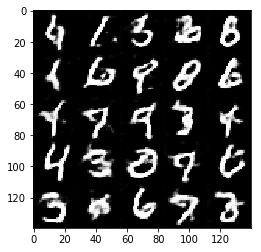

Epoch 2/2 Discriminator Loss 1.2628   Generator Loss = 0.7604
Epoch 2/2 Discriminator Loss 1.4502   Generator Loss = 0.7922
Epoch 2/2 Discriminator Loss 1.1691   Generator Loss = 0.7719
Epoch 2/2 Discriminator Loss 1.2964   Generator Loss = 0.7552
Epoch 2/2 Discriminator Loss 1.3349   Generator Loss = 0.7404
Epoch 2/2 Discriminator Loss 1.2668   Generator Loss = 0.9112
Epoch 2/2 Discriminator Loss 1.2916   Generator Loss = 0.7817
Epoch 2/2 Discriminator Loss 1.2717   Generator Loss = 0.7660
Epoch 2/2 Discriminator Loss 1.2396   Generator Loss = 0.7833
Epoch 2/2 Discriminator Loss 1.3719   Generator Loss = 0.7582


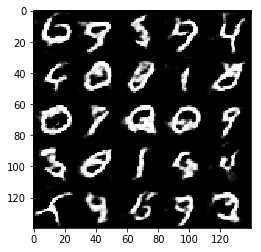

Epoch 2/2 Discriminator Loss 1.2197   Generator Loss = 0.7500
Epoch 2/2 Discriminator Loss 1.3601   Generator Loss = 0.6835
Epoch 2/2 Discriminator Loss 1.3121   Generator Loss = 0.8448
Epoch 2/2 Discriminator Loss 1.2721   Generator Loss = 0.8523
Epoch 2/2 Discriminator Loss 1.3030   Generator Loss = 0.7072
Epoch 2/2 Discriminator Loss 1.3003   Generator Loss = 0.7245
Epoch 2/2 Discriminator Loss 1.1274   Generator Loss = 0.8786
Epoch 2/2 Discriminator Loss 1.1073   Generator Loss = 0.8663
Epoch 2/2 Discriminator Loss 1.2681   Generator Loss = 0.7482
Epoch 2/2 Discriminator Loss 1.3497   Generator Loss = 0.6641


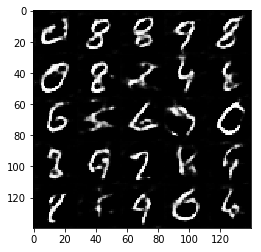

Epoch 2/2 Discriminator Loss 1.3912   Generator Loss = 0.6456
Epoch 2/2 Discriminator Loss 1.1874   Generator Loss = 0.8335
Epoch 2/2 Discriminator Loss 1.1360   Generator Loss = 0.8301
Epoch 2/2 Discriminator Loss 1.1620   Generator Loss = 0.8538
Epoch 2/2 Discriminator Loss 1.1815   Generator Loss = 0.8273
Epoch 2/2 Discriminator Loss 1.4039   Generator Loss = 0.7815
Epoch 2/2 Discriminator Loss 1.3272   Generator Loss = 0.8120
Epoch 2/2 Discriminator Loss 1.4031   Generator Loss = 0.7391
Epoch 2/2 Discriminator Loss 1.2424   Generator Loss = 0.8155
Epoch 2/2 Discriminator Loss 1.2266   Generator Loss = 0.7577


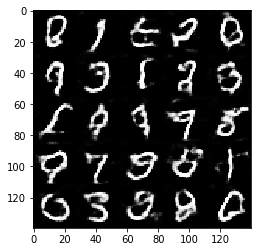

Epoch 2/2 Discriminator Loss 1.0869   Generator Loss = 0.8576
Epoch 2/2 Discriminator Loss 1.0998   Generator Loss = 0.7990
Epoch 2/2 Discriminator Loss 1.2315   Generator Loss = 0.8151
Epoch 2/2 Discriminator Loss 1.3457   Generator Loss = 0.7415
Epoch 2/2 Discriminator Loss 1.4522   Generator Loss = 0.7585
Epoch 2/2 Discriminator Loss 1.4400   Generator Loss = 0.7154
Epoch 2/2 Discriminator Loss 1.3746   Generator Loss = 0.8060
Epoch 2/2 Discriminator Loss 1.1728   Generator Loss = 0.9599
Epoch 2/2 Discriminator Loss 1.2964   Generator Loss = 0.7356
Epoch 2/2 Discriminator Loss 1.1250   Generator Loss = 0.9915


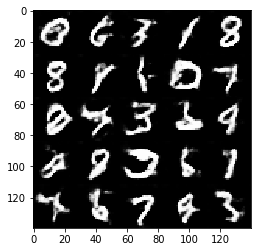

Epoch 2/2 Discriminator Loss 1.2187   Generator Loss = 0.7508
Epoch 2/2 Discriminator Loss 1.2393   Generator Loss = 0.8065
Epoch 2/2 Discriminator Loss 1.3084   Generator Loss = 0.6889
Epoch 2/2 Discriminator Loss 1.3719   Generator Loss = 0.7207
Epoch 2/2 Discriminator Loss 1.1832   Generator Loss = 0.9549
Epoch 2/2 Discriminator Loss 1.3507   Generator Loss = 0.7754
Epoch 2/2 Discriminator Loss 1.1474   Generator Loss = 0.8021
Epoch 2/2 Discriminator Loss 1.2389   Generator Loss = 0.7854
Epoch 2/2 Discriminator Loss 1.2581   Generator Loss = 0.8508
Epoch 2/2 Discriminator Loss 1.2380   Generator Loss = 0.8067


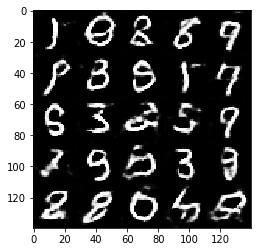

Epoch 2/2 Discriminator Loss 1.1486   Generator Loss = 1.0736
Epoch 2/2 Discriminator Loss 1.1406   Generator Loss = 0.9459
Epoch 2/2 Discriminator Loss 1.2080   Generator Loss = 0.7915
Epoch 2/2 Discriminator Loss 1.2191   Generator Loss = 0.7861
Epoch 2/2 Discriminator Loss 1.1934   Generator Loss = 0.7344
Epoch 2/2 Discriminator Loss 1.2544   Generator Loss = 0.6214
Epoch 2/2 Discriminator Loss 1.2591   Generator Loss = 0.7624
Epoch 2/2 Discriminator Loss 1.2228   Generator Loss = 0.6908
Epoch 2/2 Discriminator Loss 1.2849   Generator Loss = 0.7765
Epoch 2/2 Discriminator Loss 1.1963   Generator Loss = 0.8631


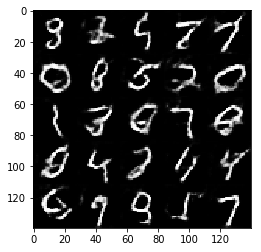

Epoch 2/2 Discriminator Loss 1.2980   Generator Loss = 0.6889
Epoch 2/2 Discriminator Loss 1.3155   Generator Loss = 0.8045
Epoch 2/2 Discriminator Loss 1.3629   Generator Loss = 0.7089
Epoch 2/2 Discriminator Loss 1.3632   Generator Loss = 0.7309
Epoch 2/2 Discriminator Loss 1.3426   Generator Loss = 0.6827
Epoch 2/2 Discriminator Loss 1.1172   Generator Loss = 0.8619
Epoch 2/2 Discriminator Loss 1.3164   Generator Loss = 0.8363
Epoch 2/2 Discriminator Loss 1.1867   Generator Loss = 0.9078
Epoch 2/2 Discriminator Loss 1.1884   Generator Loss = 0.7303
Epoch 2/2 Discriminator Loss 1.2826   Generator Loss = 0.6444


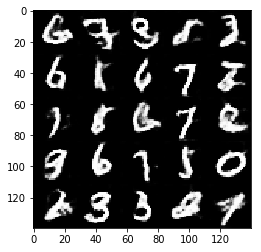

Epoch 2/2 Discriminator Loss 1.3189   Generator Loss = 0.6926
Epoch 2/2 Discriminator Loss 1.3334   Generator Loss = 0.6320
Epoch 2/2 Discriminator Loss 1.3870   Generator Loss = 0.8107
Epoch 2/2 Discriminator Loss 1.2438   Generator Loss = 0.9528
Epoch 2/2 Discriminator Loss 1.2700   Generator Loss = 0.8300
Epoch 2/2 Discriminator Loss 1.2455   Generator Loss = 0.7045
Epoch 2/2 Discriminator Loss 1.1430   Generator Loss = 0.8639
Epoch 2/2 Discriminator Loss 1.2867   Generator Loss = 0.7613
Epoch 2/2 Discriminator Loss 1.1780   Generator Loss = 0.8377
Epoch 2/2 Discriminator Loss 1.2142   Generator Loss = 0.7740


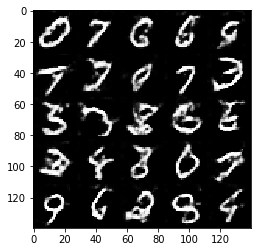

Epoch 2/2 Discriminator Loss 1.4166   Generator Loss = 0.5526
Epoch 2/2 Discriminator Loss 1.3430   Generator Loss = 0.9127
Epoch 2/2 Discriminator Loss 1.4759   Generator Loss = 0.7415
Epoch 2/2 Discriminator Loss 1.4573   Generator Loss = 0.7088
Epoch 2/2 Discriminator Loss 1.3316   Generator Loss = 0.9157
Epoch 2/2 Discriminator Loss 1.2229   Generator Loss = 0.9696
Epoch 2/2 Discriminator Loss 1.1635   Generator Loss = 0.8466


In [17]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 Discriminator Loss 1.4029   Generator Loss = 0.6024


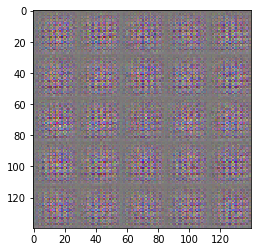

Epoch 1/1 Discriminator Loss 1.2278   Generator Loss = 0.8727
Epoch 1/1 Discriminator Loss 1.2693   Generator Loss = 0.5797
Epoch 1/1 Discriminator Loss 0.8037   Generator Loss = 1.1715
Epoch 1/1 Discriminator Loss 0.3828   Generator Loss = 2.7509
Epoch 1/1 Discriminator Loss 0.8539   Generator Loss = 1.1385
Epoch 1/1 Discriminator Loss 0.6497   Generator Loss = 1.2897
Epoch 1/1 Discriminator Loss 0.9142   Generator Loss = 1.1109
Epoch 1/1 Discriminator Loss 0.6745   Generator Loss = 0.9734
Epoch 1/1 Discriminator Loss 1.1027   Generator Loss = 0.6578
Epoch 1/1 Discriminator Loss 1.4701   Generator Loss = 1.0064


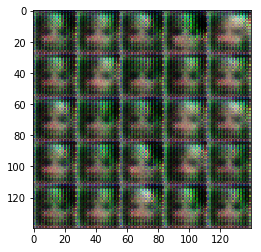

Epoch 1/1 Discriminator Loss 1.3149   Generator Loss = 1.0721
Epoch 1/1 Discriminator Loss 1.1092   Generator Loss = 0.8129
Epoch 1/1 Discriminator Loss 1.2386   Generator Loss = 0.8276
Epoch 1/1 Discriminator Loss 1.0974   Generator Loss = 1.1295
Epoch 1/1 Discriminator Loss 0.7760   Generator Loss = 1.1021
Epoch 1/1 Discriminator Loss 1.6118   Generator Loss = 0.8178
Epoch 1/1 Discriminator Loss 0.9036   Generator Loss = 0.9710
Epoch 1/1 Discriminator Loss 1.3570   Generator Loss = 0.9993
Epoch 1/1 Discriminator Loss 1.1985   Generator Loss = 0.8504
Epoch 1/1 Discriminator Loss 0.8547   Generator Loss = 1.8909


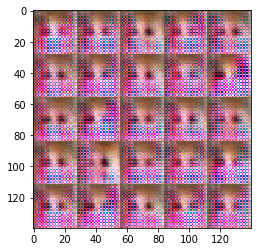

Epoch 1/1 Discriminator Loss 1.2021   Generator Loss = 1.2895
Epoch 1/1 Discriminator Loss 1.1150   Generator Loss = 1.2565
Epoch 1/1 Discriminator Loss 1.1050   Generator Loss = 0.7934
Epoch 1/1 Discriminator Loss 0.9493   Generator Loss = 1.1693
Epoch 1/1 Discriminator Loss 1.2793   Generator Loss = 0.7423
Epoch 1/1 Discriminator Loss 1.1068   Generator Loss = 1.3120
Epoch 1/1 Discriminator Loss 1.1307   Generator Loss = 0.9979
Epoch 1/1 Discriminator Loss 1.2123   Generator Loss = 1.3702
Epoch 1/1 Discriminator Loss 0.5998   Generator Loss = 1.4833
Epoch 1/1 Discriminator Loss 1.3833   Generator Loss = 0.5453


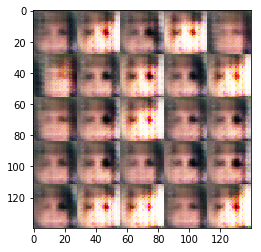

Epoch 1/1 Discriminator Loss 0.8032   Generator Loss = 1.1829
Epoch 1/1 Discriminator Loss 0.9907   Generator Loss = 2.0641
Epoch 1/1 Discriminator Loss 1.2647   Generator Loss = 0.8555
Epoch 1/1 Discriminator Loss 0.9860   Generator Loss = 1.1002
Epoch 1/1 Discriminator Loss 1.4693   Generator Loss = 0.7796
Epoch 1/1 Discriminator Loss 1.2940   Generator Loss = 0.8176
Epoch 1/1 Discriminator Loss 1.3301   Generator Loss = 0.7778
Epoch 1/1 Discriminator Loss 1.1604   Generator Loss = 0.8079
Epoch 1/1 Discriminator Loss 1.1780   Generator Loss = 0.9758
Epoch 1/1 Discriminator Loss 1.2830   Generator Loss = 0.7708


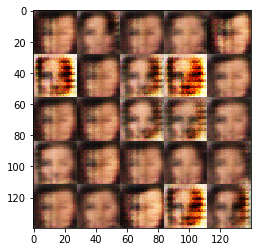

Epoch 1/1 Discriminator Loss 0.9543   Generator Loss = 1.0560
Epoch 1/1 Discriminator Loss 1.7077   Generator Loss = 0.6949
Epoch 1/1 Discriminator Loss 1.3809   Generator Loss = 0.7133
Epoch 1/1 Discriminator Loss 1.2204   Generator Loss = 0.9360
Epoch 1/1 Discriminator Loss 1.1883   Generator Loss = 0.8821
Epoch 1/1 Discriminator Loss 1.4418   Generator Loss = 0.8769
Epoch 1/1 Discriminator Loss 1.0351   Generator Loss = 0.8225
Epoch 1/1 Discriminator Loss 1.3552   Generator Loss = 0.8060
Epoch 1/1 Discriminator Loss 1.3490   Generator Loss = 0.8169
Epoch 1/1 Discriminator Loss 1.1381   Generator Loss = 0.9514


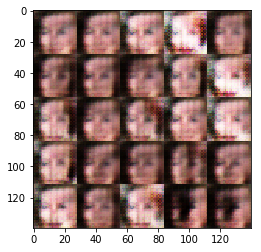

Epoch 1/1 Discriminator Loss 0.8492   Generator Loss = 1.1997
Epoch 1/1 Discriminator Loss 1.7387   Generator Loss = 0.5588
Epoch 1/1 Discriminator Loss 1.3408   Generator Loss = 0.5896
Epoch 1/1 Discriminator Loss 1.0235   Generator Loss = 0.9259
Epoch 1/1 Discriminator Loss 1.3798   Generator Loss = 1.1384
Epoch 1/1 Discriminator Loss 1.1486   Generator Loss = 0.7731
Epoch 1/1 Discriminator Loss 1.1684   Generator Loss = 0.9568
Epoch 1/1 Discriminator Loss 0.8835   Generator Loss = 0.9283
Epoch 1/1 Discriminator Loss 1.5331   Generator Loss = 0.4515
Epoch 1/1 Discriminator Loss 0.9649   Generator Loss = 1.0693


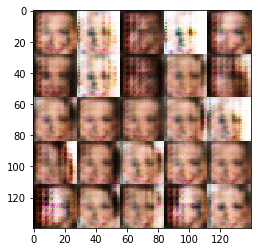

Epoch 1/1 Discriminator Loss 1.4266   Generator Loss = 0.9319
Epoch 1/1 Discriminator Loss 1.3072   Generator Loss = 0.7783
Epoch 1/1 Discriminator Loss 1.2003   Generator Loss = 0.9929
Epoch 1/1 Discriminator Loss 1.1671   Generator Loss = 1.0434
Epoch 1/1 Discriminator Loss 1.0739   Generator Loss = 0.7777
Epoch 1/1 Discriminator Loss 1.3009   Generator Loss = 0.5572
Epoch 1/1 Discriminator Loss 1.3108   Generator Loss = 0.7019
Epoch 1/1 Discriminator Loss 1.3903   Generator Loss = 0.8096
Epoch 1/1 Discriminator Loss 1.5056   Generator Loss = 0.9534
Epoch 1/1 Discriminator Loss 1.3067   Generator Loss = 0.8079


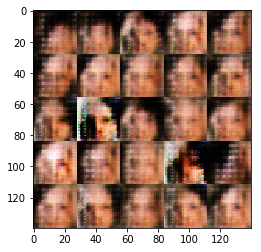

Epoch 1/1 Discriminator Loss 1.1129   Generator Loss = 0.7592
Epoch 1/1 Discriminator Loss 1.2116   Generator Loss = 0.9875
Epoch 1/1 Discriminator Loss 1.1771   Generator Loss = 1.1092
Epoch 1/1 Discriminator Loss 1.1814   Generator Loss = 1.1209
Epoch 1/1 Discriminator Loss 1.2556   Generator Loss = 0.9443
Epoch 1/1 Discriminator Loss 1.1237   Generator Loss = 0.9695
Epoch 1/1 Discriminator Loss 1.1550   Generator Loss = 0.9922
Epoch 1/1 Discriminator Loss 1.1493   Generator Loss = 0.9499
Epoch 1/1 Discriminator Loss 1.0440   Generator Loss = 1.1999
Epoch 1/1 Discriminator Loss 1.0709   Generator Loss = 0.9245


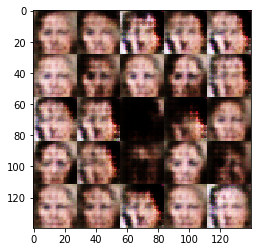

Epoch 1/1 Discriminator Loss 0.9124   Generator Loss = 1.0802
Epoch 1/1 Discriminator Loss 1.0061   Generator Loss = 0.9538
Epoch 1/1 Discriminator Loss 1.2981   Generator Loss = 0.9885
Epoch 1/1 Discriminator Loss 1.4214   Generator Loss = 0.8037
Epoch 1/1 Discriminator Loss 1.0986   Generator Loss = 0.8816
Epoch 1/1 Discriminator Loss 1.1871   Generator Loss = 0.9396
Epoch 1/1 Discriminator Loss 1.0002   Generator Loss = 0.8841
Epoch 1/1 Discriminator Loss 1.0696   Generator Loss = 0.8748
Epoch 1/1 Discriminator Loss 1.1131   Generator Loss = 0.8831
Epoch 1/1 Discriminator Loss 1.0641   Generator Loss = 0.8302


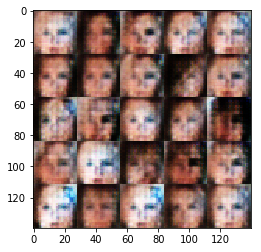

Epoch 1/1 Discriminator Loss 0.9730   Generator Loss = 0.9680
Epoch 1/1 Discriminator Loss 1.1062   Generator Loss = 0.8111
Epoch 1/1 Discriminator Loss 0.9717   Generator Loss = 1.1021
Epoch 1/1 Discriminator Loss 1.2550   Generator Loss = 0.9295
Epoch 1/1 Discriminator Loss 1.2007   Generator Loss = 1.0575
Epoch 1/1 Discriminator Loss 1.1662   Generator Loss = 0.9431
Epoch 1/1 Discriminator Loss 1.1792   Generator Loss = 0.7932
Epoch 1/1 Discriminator Loss 1.2691   Generator Loss = 0.6740
Epoch 1/1 Discriminator Loss 1.2732   Generator Loss = 0.8184
Epoch 1/1 Discriminator Loss 1.1326   Generator Loss = 0.8692


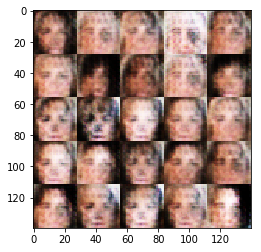

Epoch 1/1 Discriminator Loss 1.2395   Generator Loss = 0.9613
Epoch 1/1 Discriminator Loss 1.3560   Generator Loss = 1.1342
Epoch 1/1 Discriminator Loss 1.1102   Generator Loss = 1.1471
Epoch 1/1 Discriminator Loss 1.2095   Generator Loss = 0.8569
Epoch 1/1 Discriminator Loss 1.0752   Generator Loss = 1.0996
Epoch 1/1 Discriminator Loss 1.1978   Generator Loss = 0.8084
Epoch 1/1 Discriminator Loss 1.0516   Generator Loss = 0.9091
Epoch 1/1 Discriminator Loss 1.0930   Generator Loss = 0.8849
Epoch 1/1 Discriminator Loss 1.0939   Generator Loss = 0.9070
Epoch 1/1 Discriminator Loss 1.2260   Generator Loss = 0.7940


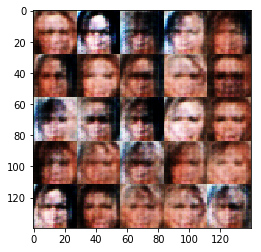

Epoch 1/1 Discriminator Loss 1.2014   Generator Loss = 0.7980
Epoch 1/1 Discriminator Loss 1.1472   Generator Loss = 0.8182
Epoch 1/1 Discriminator Loss 1.1062   Generator Loss = 0.9759
Epoch 1/1 Discriminator Loss 1.0786   Generator Loss = 1.0324
Epoch 1/1 Discriminator Loss 1.2896   Generator Loss = 0.8007
Epoch 1/1 Discriminator Loss 1.2390   Generator Loss = 0.8923
Epoch 1/1 Discriminator Loss 1.0918   Generator Loss = 0.7622
Epoch 1/1 Discriminator Loss 1.1874   Generator Loss = 1.0720
Epoch 1/1 Discriminator Loss 1.1853   Generator Loss = 0.8659
Epoch 1/1 Discriminator Loss 1.2864   Generator Loss = 0.7827


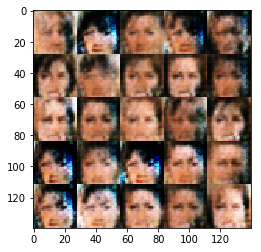

Epoch 1/1 Discriminator Loss 1.3604   Generator Loss = 0.6644
Epoch 1/1 Discriminator Loss 1.2168   Generator Loss = 0.7902
Epoch 1/1 Discriminator Loss 1.1194   Generator Loss = 0.9182
Epoch 1/1 Discriminator Loss 1.1612   Generator Loss = 1.0589
Epoch 1/1 Discriminator Loss 1.3528   Generator Loss = 0.7226
Epoch 1/1 Discriminator Loss 1.3450   Generator Loss = 0.6933
Epoch 1/1 Discriminator Loss 1.3771   Generator Loss = 0.7310
Epoch 1/1 Discriminator Loss 1.1370   Generator Loss = 1.2685
Epoch 1/1 Discriminator Loss 1.2457   Generator Loss = 0.8501
Epoch 1/1 Discriminator Loss 1.1620   Generator Loss = 0.8896


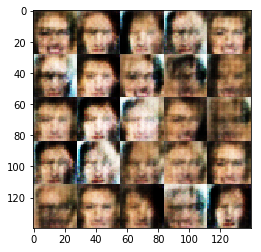

Epoch 1/1 Discriminator Loss 1.2211   Generator Loss = 0.7652
Epoch 1/1 Discriminator Loss 1.1933   Generator Loss = 0.7693
Epoch 1/1 Discriminator Loss 1.2078   Generator Loss = 1.1318
Epoch 1/1 Discriminator Loss 1.1755   Generator Loss = 0.8827
Epoch 1/1 Discriminator Loss 1.2346   Generator Loss = 0.6419
Epoch 1/1 Discriminator Loss 1.1500   Generator Loss = 0.9301
Epoch 1/1 Discriminator Loss 1.4584   Generator Loss = 0.5962
Epoch 1/1 Discriminator Loss 1.2307   Generator Loss = 0.8587
Epoch 1/1 Discriminator Loss 0.9567   Generator Loss = 0.8940
Epoch 1/1 Discriminator Loss 1.1783   Generator Loss = 0.6559


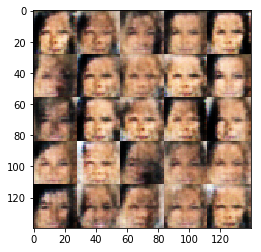

Epoch 1/1 Discriminator Loss 1.2888   Generator Loss = 0.8915
Epoch 1/1 Discriminator Loss 1.3157   Generator Loss = 0.6428
Epoch 1/1 Discriminator Loss 1.2342   Generator Loss = 0.7762
Epoch 1/1 Discriminator Loss 1.3436   Generator Loss = 0.7346
Epoch 1/1 Discriminator Loss 1.1393   Generator Loss = 0.7970
Epoch 1/1 Discriminator Loss 1.0545   Generator Loss = 0.8935
Epoch 1/1 Discriminator Loss 1.3741   Generator Loss = 0.7165
Epoch 1/1 Discriminator Loss 1.1145   Generator Loss = 0.7662
Epoch 1/1 Discriminator Loss 1.2267   Generator Loss = 1.0007
Epoch 1/1 Discriminator Loss 1.1516   Generator Loss = 0.7698


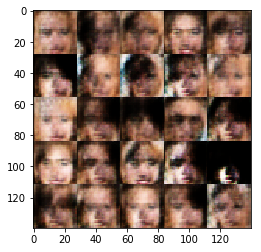

Epoch 1/1 Discriminator Loss 1.2034   Generator Loss = 0.8217
Epoch 1/1 Discriminator Loss 1.1336   Generator Loss = 0.8831
Epoch 1/1 Discriminator Loss 1.1296   Generator Loss = 0.7884
Epoch 1/1 Discriminator Loss 1.1740   Generator Loss = 0.8537
Epoch 1/1 Discriminator Loss 1.2509   Generator Loss = 0.8980
Epoch 1/1 Discriminator Loss 1.1321   Generator Loss = 0.9695
Epoch 1/1 Discriminator Loss 1.1305   Generator Loss = 0.7106
Epoch 1/1 Discriminator Loss 1.3092   Generator Loss = 1.0271
Epoch 1/1 Discriminator Loss 1.1691   Generator Loss = 0.8400
Epoch 1/1 Discriminator Loss 1.3850   Generator Loss = 1.0199


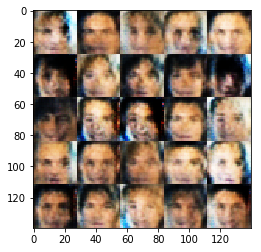

Epoch 1/1 Discriminator Loss 1.1166   Generator Loss = 1.1046
Epoch 1/1 Discriminator Loss 1.2806   Generator Loss = 0.9568
Epoch 1/1 Discriminator Loss 1.2163   Generator Loss = 0.8021
Epoch 1/1 Discriminator Loss 1.3028   Generator Loss = 0.9984
Epoch 1/1 Discriminator Loss 1.2597   Generator Loss = 0.8305
Epoch 1/1 Discriminator Loss 1.2241   Generator Loss = 0.9577
Epoch 1/1 Discriminator Loss 1.3366   Generator Loss = 0.7219
Epoch 1/1 Discriminator Loss 1.1894   Generator Loss = 0.7845
Epoch 1/1 Discriminator Loss 1.2172   Generator Loss = 0.7382
Epoch 1/1 Discriminator Loss 1.2077   Generator Loss = 0.8282


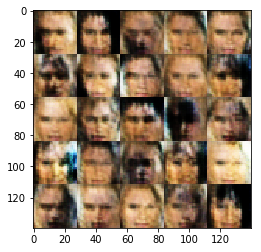

Epoch 1/1 Discriminator Loss 1.2462   Generator Loss = 0.7695
Epoch 1/1 Discriminator Loss 1.0182   Generator Loss = 1.1271
Epoch 1/1 Discriminator Loss 1.2769   Generator Loss = 0.9885
Epoch 1/1 Discriminator Loss 1.0138   Generator Loss = 0.9512
Epoch 1/1 Discriminator Loss 1.1809   Generator Loss = 1.2338
Epoch 1/1 Discriminator Loss 1.2068   Generator Loss = 0.6890
Epoch 1/1 Discriminator Loss 1.1762   Generator Loss = 0.8690
Epoch 1/1 Discriminator Loss 1.1311   Generator Loss = 0.7874
Epoch 1/1 Discriminator Loss 1.3517   Generator Loss = 0.7998
Epoch 1/1 Discriminator Loss 1.0770   Generator Loss = 0.8951


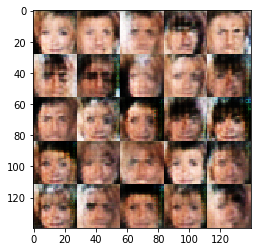

Epoch 1/1 Discriminator Loss 1.1368   Generator Loss = 0.8963
Epoch 1/1 Discriminator Loss 1.1621   Generator Loss = 0.8664
Epoch 1/1 Discriminator Loss 1.3241   Generator Loss = 0.8704
Epoch 1/1 Discriminator Loss 1.1864   Generator Loss = 0.7381
Epoch 1/1 Discriminator Loss 1.2323   Generator Loss = 0.8610
Epoch 1/1 Discriminator Loss 1.2522   Generator Loss = 0.5577
Epoch 1/1 Discriminator Loss 1.1760   Generator Loss = 0.8281
Epoch 1/1 Discriminator Loss 1.2865   Generator Loss = 0.7461
Epoch 1/1 Discriminator Loss 1.3622   Generator Loss = 0.8889
Epoch 1/1 Discriminator Loss 1.1486   Generator Loss = 0.8025


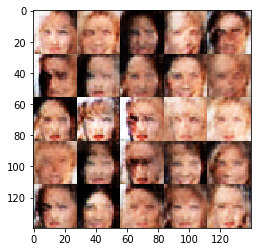

Epoch 1/1 Discriminator Loss 1.0815   Generator Loss = 0.7824
Epoch 1/1 Discriminator Loss 1.2796   Generator Loss = 0.7113
Epoch 1/1 Discriminator Loss 1.2727   Generator Loss = 0.9507
Epoch 1/1 Discriminator Loss 1.2893   Generator Loss = 1.0904
Epoch 1/1 Discriminator Loss 1.1235   Generator Loss = 0.9647
Epoch 1/1 Discriminator Loss 1.2726   Generator Loss = 0.8130
Epoch 1/1 Discriminator Loss 1.1863   Generator Loss = 0.7868
Epoch 1/1 Discriminator Loss 1.3337   Generator Loss = 0.7979
Epoch 1/1 Discriminator Loss 1.3519   Generator Loss = 0.7965
Epoch 1/1 Discriminator Loss 1.2270   Generator Loss = 0.7784


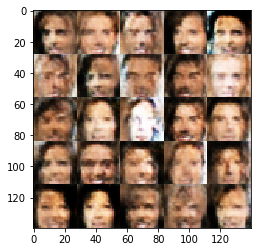

Epoch 1/1 Discriminator Loss 1.1822   Generator Loss = 0.6398
Epoch 1/1 Discriminator Loss 1.3191   Generator Loss = 0.7481
Epoch 1/1 Discriminator Loss 1.2358   Generator Loss = 0.6871
Epoch 1/1 Discriminator Loss 1.3776   Generator Loss = 0.9130
Epoch 1/1 Discriminator Loss 1.1582   Generator Loss = 0.6969
Epoch 1/1 Discriminator Loss 1.2557   Generator Loss = 0.8950
Epoch 1/1 Discriminator Loss 1.3324   Generator Loss = 0.7148
Epoch 1/1 Discriminator Loss 1.3982   Generator Loss = 0.5415
Epoch 1/1 Discriminator Loss 1.3604   Generator Loss = 0.9513
Epoch 1/1 Discriminator Loss 1.3529   Generator Loss = 0.8186


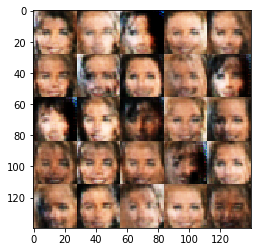

Epoch 1/1 Discriminator Loss 1.1575   Generator Loss = 0.7697
Epoch 1/1 Discriminator Loss 1.3497   Generator Loss = 0.6952
Epoch 1/1 Discriminator Loss 1.3712   Generator Loss = 0.7047
Epoch 1/1 Discriminator Loss 1.1903   Generator Loss = 0.9983
Epoch 1/1 Discriminator Loss 1.0066   Generator Loss = 0.8911
Epoch 1/1 Discriminator Loss 1.4893   Generator Loss = 0.5770
Epoch 1/1 Discriminator Loss 1.3436   Generator Loss = 0.7170
Epoch 1/1 Discriminator Loss 0.9190   Generator Loss = 1.0904
Epoch 1/1 Discriminator Loss 1.2547   Generator Loss = 0.8780
Epoch 1/1 Discriminator Loss 1.5309   Generator Loss = 1.6384


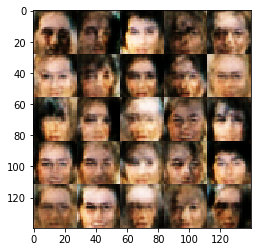

Epoch 1/1 Discriminator Loss 1.2066   Generator Loss = 0.7756
Epoch 1/1 Discriminator Loss 1.2835   Generator Loss = 1.0118
Epoch 1/1 Discriminator Loss 1.4301   Generator Loss = 0.6543
Epoch 1/1 Discriminator Loss 1.2747   Generator Loss = 1.1216
Epoch 1/1 Discriminator Loss 1.0766   Generator Loss = 1.3274
Epoch 1/1 Discriminator Loss 1.1453   Generator Loss = 1.0722
Epoch 1/1 Discriminator Loss 1.1132   Generator Loss = 0.9092
Epoch 1/1 Discriminator Loss 1.1050   Generator Loss = 0.8788
Epoch 1/1 Discriminator Loss 1.2333   Generator Loss = 0.8797
Epoch 1/1 Discriminator Loss 1.3079   Generator Loss = 0.7697


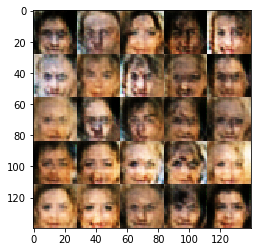

Epoch 1/1 Discriminator Loss 1.2349   Generator Loss = 0.8971
Epoch 1/1 Discriminator Loss 1.0208   Generator Loss = 1.2504
Epoch 1/1 Discriminator Loss 1.2415   Generator Loss = 0.6772
Epoch 1/1 Discriminator Loss 1.1461   Generator Loss = 0.7994
Epoch 1/1 Discriminator Loss 1.2650   Generator Loss = 1.3180
Epoch 1/1 Discriminator Loss 1.2508   Generator Loss = 1.0136
Epoch 1/1 Discriminator Loss 1.1667   Generator Loss = 0.8739
Epoch 1/1 Discriminator Loss 1.2226   Generator Loss = 0.7251
Epoch 1/1 Discriminator Loss 1.4603   Generator Loss = 1.1579
Epoch 1/1 Discriminator Loss 1.1541   Generator Loss = 0.8531


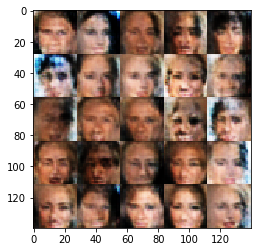

Epoch 1/1 Discriminator Loss 1.2407   Generator Loss = 0.5370
Epoch 1/1 Discriminator Loss 1.1388   Generator Loss = 0.8419
Epoch 1/1 Discriminator Loss 1.2640   Generator Loss = 0.8050
Epoch 1/1 Discriminator Loss 1.1386   Generator Loss = 0.8949
Epoch 1/1 Discriminator Loss 1.0820   Generator Loss = 0.9689
Epoch 1/1 Discriminator Loss 1.1987   Generator Loss = 0.7847
Epoch 1/1 Discriminator Loss 1.4162   Generator Loss = 0.6204
Epoch 1/1 Discriminator Loss 1.1694   Generator Loss = 0.8890
Epoch 1/1 Discriminator Loss 1.2370   Generator Loss = 0.9199
Epoch 1/1 Discriminator Loss 1.1554   Generator Loss = 0.9015


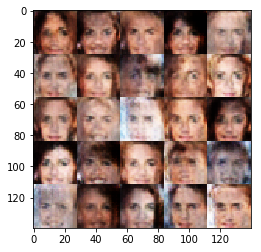

Epoch 1/1 Discriminator Loss 1.1814   Generator Loss = 0.8607
Epoch 1/1 Discriminator Loss 1.2626   Generator Loss = 0.8838
Epoch 1/1 Discriminator Loss 1.2946   Generator Loss = 0.8344
Epoch 1/1 Discriminator Loss 1.1872   Generator Loss = 0.8238
Epoch 1/1 Discriminator Loss 1.1003   Generator Loss = 0.8980
Epoch 1/1 Discriminator Loss 1.2676   Generator Loss = 0.7860
Epoch 1/1 Discriminator Loss 1.3162   Generator Loss = 0.7583
Epoch 1/1 Discriminator Loss 1.4268   Generator Loss = 0.6517
Epoch 1/1 Discriminator Loss 1.1308   Generator Loss = 0.8556
Epoch 1/1 Discriminator Loss 1.2392   Generator Loss = 0.7791


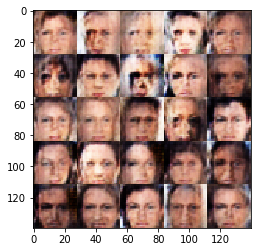

Epoch 1/1 Discriminator Loss 1.2758   Generator Loss = 0.7516
Epoch 1/1 Discriminator Loss 1.2750   Generator Loss = 0.7860
Epoch 1/1 Discriminator Loss 1.3108   Generator Loss = 0.7404
Epoch 1/1 Discriminator Loss 1.1225   Generator Loss = 0.8116
Epoch 1/1 Discriminator Loss 1.2094   Generator Loss = 0.8128
Epoch 1/1 Discriminator Loss 1.2748   Generator Loss = 0.8058
Epoch 1/1 Discriminator Loss 1.1942   Generator Loss = 0.7809
Epoch 1/1 Discriminator Loss 1.1701   Generator Loss = 0.7892
Epoch 1/1 Discriminator Loss 1.2418   Generator Loss = 0.7644
Epoch 1/1 Discriminator Loss 1.2951   Generator Loss = 0.8396


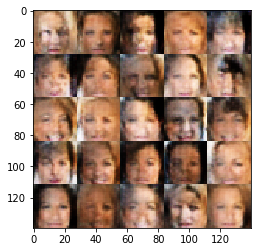

Epoch 1/1 Discriminator Loss 1.2178   Generator Loss = 0.7816
Epoch 1/1 Discriminator Loss 1.3540   Generator Loss = 0.7095
Epoch 1/1 Discriminator Loss 1.2118   Generator Loss = 0.8413
Epoch 1/1 Discriminator Loss 1.4737   Generator Loss = 0.7378
Epoch 1/1 Discriminator Loss 1.0793   Generator Loss = 0.6666
Epoch 1/1 Discriminator Loss 1.3258   Generator Loss = 0.7921
Epoch 1/1 Discriminator Loss 1.2407   Generator Loss = 0.7305
Epoch 1/1 Discriminator Loss 1.2814   Generator Loss = 0.7293
Epoch 1/1 Discriminator Loss 1.3113   Generator Loss = 0.6758
Epoch 1/1 Discriminator Loss 1.2228   Generator Loss = 0.9598


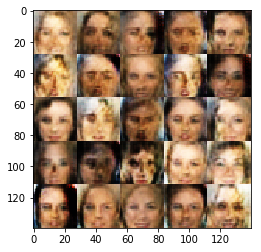

Epoch 1/1 Discriminator Loss 1.1628   Generator Loss = 0.7593
Epoch 1/1 Discriminator Loss 1.3639   Generator Loss = 1.0256
Epoch 1/1 Discriminator Loss 1.2710   Generator Loss = 0.8816
Epoch 1/1 Discriminator Loss 1.2797   Generator Loss = 0.6839
Epoch 1/1 Discriminator Loss 1.2542   Generator Loss = 0.7416
Epoch 1/1 Discriminator Loss 1.2140   Generator Loss = 0.8472
Epoch 1/1 Discriminator Loss 1.4089   Generator Loss = 0.9128
Epoch 1/1 Discriminator Loss 1.2358   Generator Loss = 0.6788
Epoch 1/1 Discriminator Loss 1.2903   Generator Loss = 0.8358
Epoch 1/1 Discriminator Loss 1.4042   Generator Loss = 0.7900


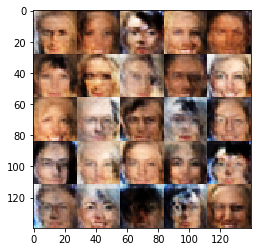

Epoch 1/1 Discriminator Loss 1.2298   Generator Loss = 0.7415
Epoch 1/1 Discriminator Loss 1.1702   Generator Loss = 0.8403
Epoch 1/1 Discriminator Loss 1.1034   Generator Loss = 0.8560
Epoch 1/1 Discriminator Loss 1.2594   Generator Loss = 1.0053
Epoch 1/1 Discriminator Loss 1.2669   Generator Loss = 0.8203
Epoch 1/1 Discriminator Loss 1.3166   Generator Loss = 0.7911
Epoch 1/1 Discriminator Loss 1.2758   Generator Loss = 0.7825
Epoch 1/1 Discriminator Loss 1.3148   Generator Loss = 0.7467
Epoch 1/1 Discriminator Loss 1.1403   Generator Loss = 1.3436
Epoch 1/1 Discriminator Loss 1.1218   Generator Loss = 0.8673


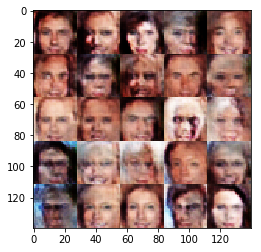

Epoch 1/1 Discriminator Loss 1.3413   Generator Loss = 0.6854
Epoch 1/1 Discriminator Loss 1.3456   Generator Loss = 0.6329
Epoch 1/1 Discriminator Loss 1.2922   Generator Loss = 0.7857
Epoch 1/1 Discriminator Loss 1.3838   Generator Loss = 0.7955
Epoch 1/1 Discriminator Loss 1.3334   Generator Loss = 0.8207
Epoch 1/1 Discriminator Loss 1.0793   Generator Loss = 1.1416
Epoch 1/1 Discriminator Loss 1.2983   Generator Loss = 0.8373
Epoch 1/1 Discriminator Loss 1.3261   Generator Loss = 0.5855
Epoch 1/1 Discriminator Loss 1.0822   Generator Loss = 1.0402
Epoch 1/1 Discriminator Loss 1.3952   Generator Loss = 0.7959


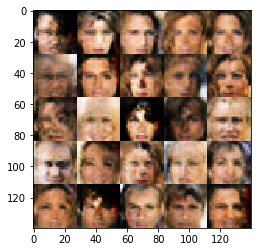

Epoch 1/1 Discriminator Loss 1.2292   Generator Loss = 0.7784
Epoch 1/1 Discriminator Loss 1.1216   Generator Loss = 0.9500
Epoch 1/1 Discriminator Loss 1.3012   Generator Loss = 0.9645
Epoch 1/1 Discriminator Loss 1.2143   Generator Loss = 1.1661
Epoch 1/1 Discriminator Loss 1.2383   Generator Loss = 0.8033
Epoch 1/1 Discriminator Loss 1.3136   Generator Loss = 0.7098


In [18]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.